In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the original image
img = cv2.imread("ColorChecker.png", cv2.IMREAD_COLOR)

In [3]:
# Define the HSV color ranges
colors = {
    "blue": ((90, 120, 50), (120, 255, 255)),
    "red": ((0, 120, 50), (10, 255, 255)),
    "green": ((45, 120, 50), (75, 255, 255)),
    "yellow": ((20, 120, 50), (30, 255, 255)),
    "orange": ((15, 120, 50), (25, 255, 255)),
    "purple": ((120, 120, 50), (150, 255, 255)),
    "grey": ((0, 0, 100), (255, 30, 200))
}

In [4]:
# Function for Color selection
def get_color_choice():
    userInput = input("Select any color from the color list : ")
    return userInput.lower()

In [5]:
def colorDetection(image, userInput):
    # Convert image to HSV color space
    hsvImg = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Get lower and upper bound for a particular HSV color
    lower_bound, upper_bound = colors[userInput]

    # Create a mask for the selected color
    mask = cv2.inRange(hsvImg, lower_bound, upper_bound)

    # Apply the mask to the original image
    selectedColors = cv2.bitwise_and(image, image, mask=mask)

    return mask, selectedColors

In [6]:
# User Interface
print('Colors Available : Blue, Red, Green, Yellow, Orange, Purple, Grey')

color = get_color_choice()
print('You Choose : ', color.upper())

Colors Available : Blue, Red, Green, Yellow, Orange, Purple, Grey
You Choose :  BLUE


(([], []), ([], []))

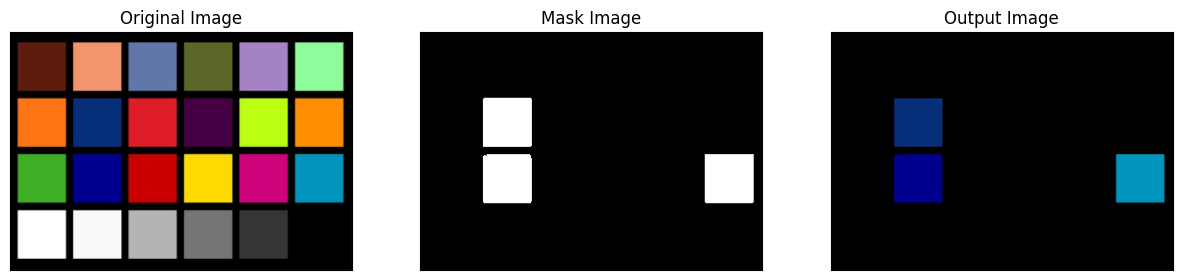

In [7]:
# Display Original, Mask and Output images using Matplotlib
mask, output = colorDetection(img, color)

inputImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 15), num='testImg')

plt.subplot(1,3,1)
plt.imshow(inputImg)
plt.title("Original Image")
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(mask)
plt.title("Mask Image")
plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(output)
plt.title("Output Image")
plt.xticks([]), plt.yticks([])